### Instrucciones para Descargar los Datos desde Kaggle

Para descargar los archivos de datos de la competencia de Kaggle directamente a este entorno de Google Colab, sigue los siguientes pasos:

1. **Generar el archivo `kaggle.json`**:
   - Ve a [Kaggle](https://www.kaggle.com).
   - Inicia sesión con tu cuenta.
   - Dirígete a tu perfil (haciendo clic en tu imagen de perfil en la esquina superior derecha) y selecciona **Settings**.
   - Desplázate hasta la sección **API** y haz clic en **Create New API Token**.
   - Esto descargará un archivo `kaggle.json` en tu computadora. Este archivo contiene las credenciales necesarias para acceder a la API de Kaggle.

2. **Subir el archivo `kaggle.json` a Google Colab**:
   - Ejecuta la celda que te pide subir archivos.
   - Selecciona el archivo `kaggle.json` que descargaste de Kaggle.

3. **Ejecutar el código para descargar los datos**:
   - Una vez que hayas subido el archivo `kaggle.json`, las siguientes celdas descargarán y descomprimirán automáticamente los archivos de la competencia desde Kaggle.


**Subir el archivo `kaggle.json`**:

In [1]:
!pip install kaggle

# Solicitar el archivo kaggle.json
from google.colab import files
files.upload()  # Subir el archivo kaggle.json

# Crear el directorio .kaggle y mover el archivo kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**Código para descargar los datos**:



In [2]:
# Descargar los datos
!kaggle competitions download -c udea-ai4eng-20242

# Descomprimir los archivos descargados
!unzip udea-ai4eng-20242.zip

 55% 11.0M/20.1M [00:00<00:00, 112MB/s]
100% 20.1M/20.1M [00:00<00:00, 148MB/s]
Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


**Importando librerías**

In [3]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Información del dataset**

In [6]:
# Cargar los datos en un DataFrame
data = pd.read_csv('train.csv')

# Visualizar las primeras filas del dataset
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [131]:
# Mostrar el tamaño del dataset
print('-------------------- tamaño del dataset --------------------')
print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")
print('------------------------------------------------------------\n')
# Mostrar tipos de datos y valores nulos
print('-------------------- tipos de datos y valores nulos --------------------')
data.info()
print('------------------------------------------------------------\n')
# Mostrar cuántos valores faltantes hay en cada columna
missing_values = data.isnull().sum()
print('-------------------- valores faltantes --------------------')
print(missing_values[missing_values > 0])
print('------------------------------------------------------------\n')


-------------------- tamaño del dataset --------------------
Filas: 692500, Columnas: 14
------------------------------------------------------------

-------------------- tipos de datos y valores nulos --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 n

**Resumen estadístico**

In [86]:
# Estadísticas descriptivas
data.describe()

,ID,PERIODO,RENDIMIENTO_GLOBAL_NUM,FAMI_ESTRATOVIVIENDA_NUM
count,692500.000000,692500.000000,692500.000000,0.0
mean,494606.130576,20198.366679,3.006654,NaN
std,285585.209455,10.535037,1.584350,NaN
min,1.000000,20183.000000,1.000000,NaN
25%,247324.750000,20195.000000,2.000000,NaN
50%,494564.500000,20195.000000,4.000000,NaN
75%,741782.500000,20203.000000,5.000000,NaN
max,989286.000000,20213.000000,5.000000,NaN


from matplotlib import pyplot as plt
_df_8['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PERIODO'].plot(kind='hist', bins=20, title='PERIODO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['RENDIMIENTO_GLOBAL_NUM'].plot(kind='hist', bins=20, title='RENDIMIENTO_GLOBAL_NUM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['FAMI_ESTRATOVIVIENDA_NUM'].plot(kind='hist', bins=20, title='FAMI_ESTRATOVIVIENDA_NUM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='ID', y='PERIODO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='PERIODO', y='RENDIMIENTO_GLOBAL_NUM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='RENDIMIENTO_GLOBAL_NUM', y='FAMI_ESTRATOVIVIENDA_NUM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['PERIODO'].plot(kind='line', figsize=(8, 4), title='PERIODO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['RENDIMIENTO_GLOBAL_NUM'].plot(kind='line', figsize=(8, 4), title='RENDIMIENTO_GLOBAL_NUM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['FAMI_ESTRATOVIVIENDA_NUM'].plot(kind='line', figsize=(8, 4), title='FAMI_ESTRATOVIVIENDA_NUM')
plt.gca().spines[['top', 'right']].set_visible(False)

**Visualización de estudiantes por departamento**

---------------------------------------------------

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64

---------------------------------------------------



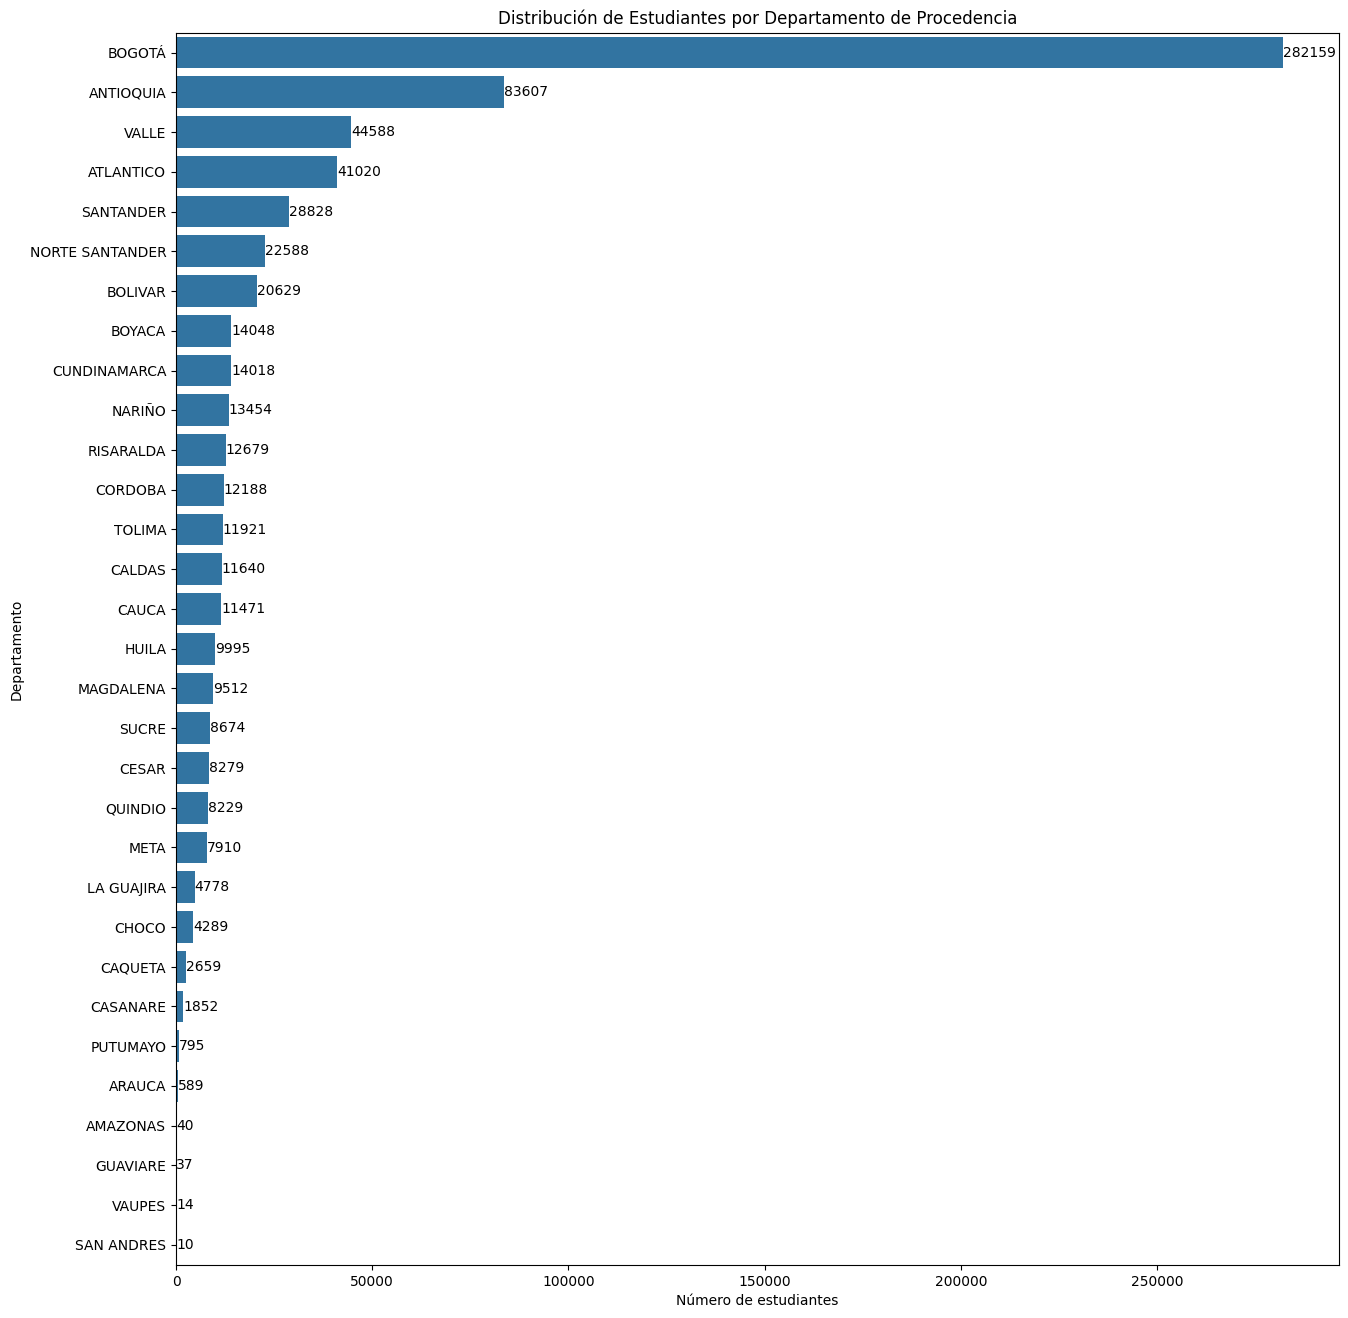

In [130]:
# Número de estudiantes por departamento
students_per_department = data['ESTU_PRGM_DEPARTAMENTO'].value_counts()
print('---------------------------------------------------\n')
print(students_per_department)
print('\n---------------------------------------------------\n')

# Ordenar los departamentos de mayor a menor cantidad de estudiantes
order = data['ESTU_PRGM_DEPARTAMENTO'].value_counts().index

# Graficar
plt.figure(figsize=(15, 16))
sns.countplot(y='ESTU_PRGM_DEPARTAMENTO', data=data, order=order)
plt.title('Distribución de Estudiantes por Departamento de Procedencia')
plt.ylabel('Departamento')
plt.xlabel('Número de estudiantes')

# Añadir etiquetas con valores a cada barra
for i, v in enumerate(data['ESTU_PRGM_DEPARTAMENTO'].value_counts()):
    plt.text(v, i, str(v), color='black', va='center')

plt.show()

**Visualización del valor de matrícula por estudiante**

---------------------------------------------------

count                                     686213
unique                                         8
top       Entre 1 millón y menos de 2.5 millones
freq                                      204048
Name: ESTU_VALORMATRICULAUNIVERSIDAD, dtype: object

---------------------------------------------------



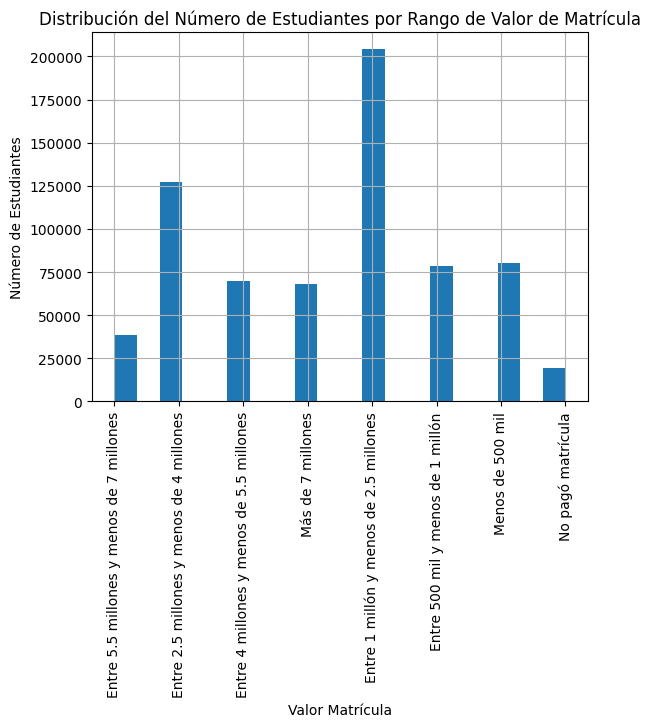

In [129]:
# Estadísticas descriptivas del valor de matrícula
stats = data['ESTU_VALORMATRICULAUNIVERSIDAD'].describe()
print('---------------------------------------------------\n')
print(stats)
print('\n---------------------------------------------------\n')

# Graficar
data['ESTU_VALORMATRICULAUNIVERSIDAD'].hist(bins=20) # definir numero de divisiones del histograma
plt.title('Distribución del Número de Estudiantes por Rango de Valor de Matrícula')
plt.xlabel('Valor Matrícula')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=90)
plt.show()

**Visualización top 10 programas académicos con más estudiantes**

---------------------------------------------------

ESTU_PRGM_ACADEMICO
DERECHO                       53244
ADMINISTRACION DE EMPRESAS    51902
CONTADURIA PUBLICA            39664
PSICOLOGIA                    31932
INGENIERIA INDUSTRIAL         28481
ADMINISTRACIÓN DE EMPRESAS    24777
INGENIERIA CIVIL              19487
MEDICINA                      18099
PSICOLOGÍA                    17377
INGENIERIA DE SISTEMAS        17150
Name: count, dtype: int64

---------------------------------------------------



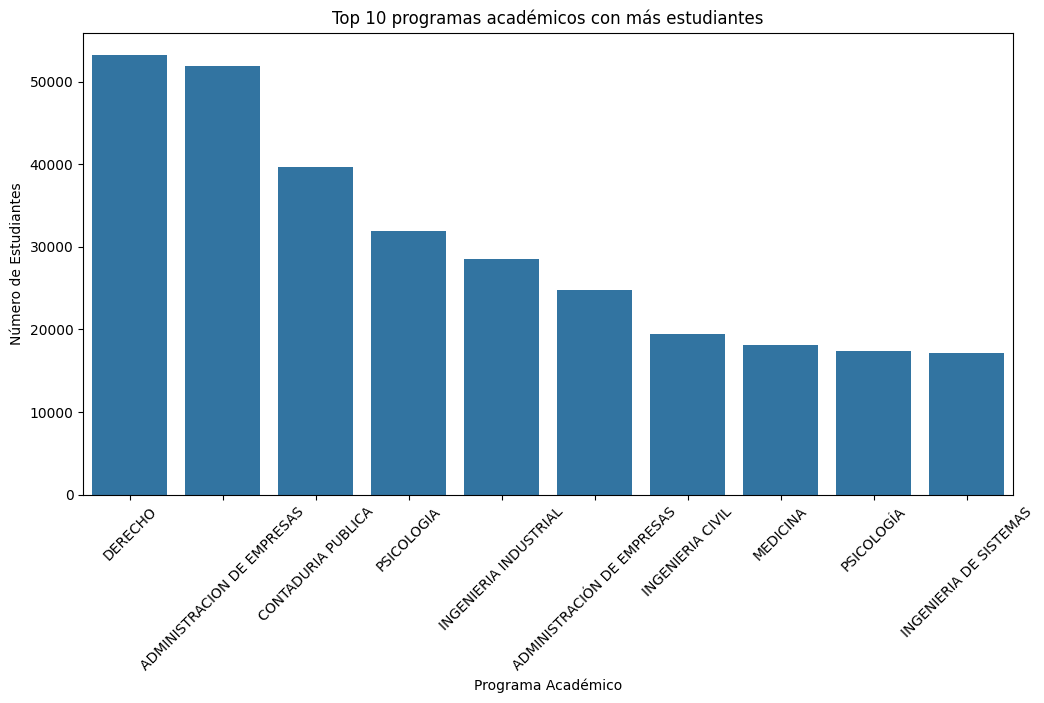

In [54]:
# Mostrar los 10 programas académicos con más estudiantes
print('---------------------------------------------------\n')
top_10_programs = data['ESTU_PRGM_ACADEMICO'].value_counts().nlargest(10)
print(top_10_programs)
print('\n---------------------------------------------------\n')

# Graficar
plt.figure(figsize=(12, 6))
sns.countplot(x='ESTU_PRGM_ACADEMICO', data=data[data['ESTU_PRGM_ACADEMICO'].isin(top_10_programs.index)],
              order=top_10_programs.index)
plt.title('Top 10 programas académicos con más estudiantes')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45)
plt.show()